In [63]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import time , sys
from jax import jit
import jax
from jax.lax import fori_loop
import numpy as np

![Convection Diagram](Screenshot%20from%202025-09-03%2020-21-59.png)

In [8]:
nx=100 
dx= 2/(nx-1)

In [19]:
dx

0.020202020202020204

In [9]:
nt= 20
dt= 0.025
c=3 #wave speed 

In [25]:
u=jnp.ones(nx) #initial condition
u=u.at[int(.5/dx):int(1/dx+1)].set(2)


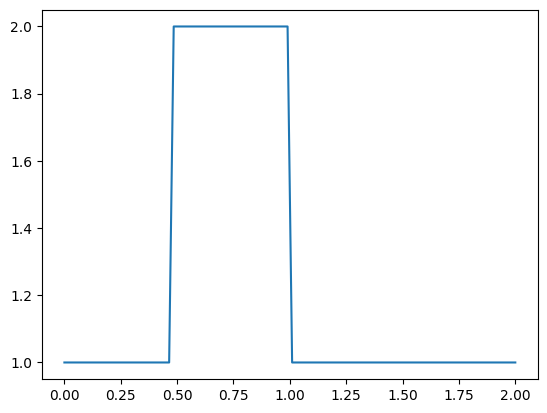

In [26]:
plt.plot(jnp.linspace(0,2,nx),u);

In [53]:
#make a solution arraty 
soln=jnp.zeros((int(nt/dt),int(nx)))
soln=soln.at[0].set(u)
soln


Array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
soln[0]

Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],      dtype=float32)

In [58]:

def step(u):
    # Inner loop: update u for all i in 1..nx-1
    def body(i, u_new):
        return u_new.at[i].set(u_new[i] - c * dt / dx * (u_new[i] - u_new[i-1]))
    return fori_loop(1, nx, body, u)

def simulate(u, nt):
    def time_body(n, u):
        u_new = step(u)
        return u_new
    return fori_loop(0, nt, time_body, u)



In [60]:


u_final = simulate(u, nt)
u_final

Array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       4.64938240e+08, 3.49865943e+10, 1.38068414e+12, 3.80173015e+13,
       8.20094679e+14, 1.47567131e+16, 2.30338821e+17, 3.20306181e+18,
       4.04503511e+19, 4.70656525e+20, 5.10236389e+21, 5.19984037e+22,
       5.01760734e+23, 4.61189643e+24, 4.05792583e+25, 3.43244618e+26,
       2.80121837e+27, 2.21252291e+28, 1.69591590e+29, 1.26452938e+30,
       9.19119462e+30, 6.52440388e+31, 4.53059709e+32, 3.08219680e+33,
       2.05700673e+34, 1.34835825e+35, 8.69048248e+35, 5.51294147e+36,
       3.44522790e+37, 2.12279512e+38,            inf,            nan,
      

In [67]:
un = np.ones(nx) # initialize a temporary array
uk=np.array(u)
for n in range(nt): # loop n from 0 to nt-1, so it will run nt times
    un = uk.copy() # copy the existing values of u into un
    for i in range(1, nx): # change the range to 0 to nx, and see what happens
        uk[i] = un[i] - c * dt / dx * (un[i]-un[i-1])

In [68]:
uk

array([ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        4.6493818e+08, -1.2261939e+10,  1.5321681e+11, -1.2056915e+12,
        6.6988335e+12, -2.7920800e+13,  9.0535780e+13, -2.3371866e+14,
        4.8744862e+14, -8.2859851e+14,  1.1527499e+15, -1.3125223e+15,
        1.2180738e+15, -9.1333224e+14,  5.4525673e+14, -2.5327025e+14,
        8.8265588e+13, -2.1722097e+13,  3.3672601e+12, -2.4736001e+11,
        2.0000000e+00,  2.0000000e+00,  2.0000000e+00,  2.0000000e+00,
        2.0000000e+00,  2.0000000e+00, -4.6493818e+08,  1.2261941e+10,
       -1.5321681e+11,  1.2056916e+12, -6.6988341e+12,  2.7920800e+13,
      

In [37]:


i=1
val=43
def body_fun(i, val):
    # Do something with val at each step i
    return val + i

result = fori_loop(0, 20, body_fun, 10)
print(result)  # Output: 45 (sum of 0..9)

200
